# DLP

In [8]:
import setup
from circuits import * 
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

In [9]:
def d_log(g,y,p=p):
    x=1
    while ((g**x % p)!=y):
        x+=1
        if(x>p):
            raise ValueError()
        
    return x

def pol2cart(rho, phi):
    y = rho * np.cos(phi)
    x = rho * np.sin(phi)
    return(x, y)

def dlp(g, p, s):
    I = [i%(p-1) if i>=p else i%p for i in list(range(s, s + int((p-3)/2)+ 1))]

    dlps = [[i, d_log(g,i,p=p)] for i in range(1,p)]

    dlps = [dlp + ["green"] if (dlp[1] in I)  else dlp + ["red"] for dlp in dlps]
    
    dlps_order, dlps_log_order, _ = list(zip(*dlps))

    coords_labels = [[pol2cart(1, (dlp[0]-1)*np.pi*2/(p-1)), dlp[2]] for dlp in dlps]

    coords_labels_log = [[pol2cart(1, (dlp[1]-1)*np.pi*2/(p-1)), dlp[2]] for dlp in dlps]

    coords, labels = list(zip(*coords_labels))

    coords_log, _ = list(zip(*coords_labels_log))
    
    s_i = np.array(coords[I[0]-1])
    
    s_f = np.array(coords[I[-1]])
    
    dlp_plot(coords, labels, title=r"$\mathbb{{Z}}^{{*}}_{{{p}}}$".format(p=p))
    
    dlp_plot(coords_log, labels,  diameter=(s_i, s_f), title=r"$\log_{{{g}}}({{\mathbb{{Z}}^{{*}}_{{{p}}}}})$".format(g=g, p=p))

def dlp_plot(coords, labels, diameter=None, title=None):
    circle1 = plt.Circle((0, 0), 1, facecolor= 'none', edgecolor='black', linewidth=3, zorder=0)

    
    fig, ax = plt.subplots(figsize=(5,5)) 

    if(diameter):
        plt.plot(*list(zip(*diameter)), color='black', linewidth=3)
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)

    ax.add_patch(circle1)
    
    xs, ys = list(zip(*coords))

    plt.scatter(xs, ys, color=labels, linewidth=3,zorder =5)
    [plt.annotate(str(i), xy=1.2*np.array(coords[i-1]), ha="center", va="center") for i in range(1,len(xs)+1)]
    plt.axis('off')
    
    plt.title(title, fontsize=20, loc='left')
    
    plt.savefig("./images/DLP/" + ''.join(e for e in title if e.isalnum()) + ".pdf",  bbox_inches='tight')
    
    plt.show()

In [10]:
p = 29
g = 11
s = 11

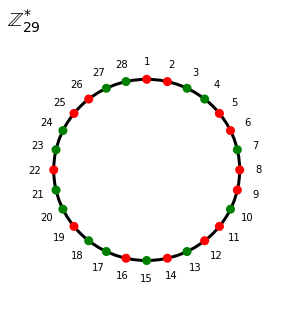

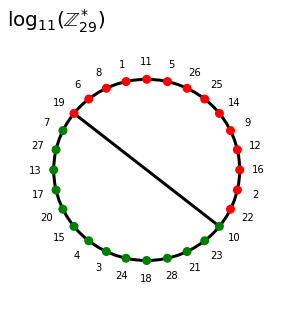

In [11]:
dlp(g,p,s)